### this script follow the tutorial at https://www.archrproject.com/articles/Articles/tutorial.html

In [1]:
library(ArchR)
set.seed(1)


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [2]:
addArchRThreads(threads = 16) 

Setting default number of Parallel threads to 16.



### download data

In [4]:
setwd("../data/")

In [5]:
inputFiles <- getTutorialData("Hematopoiesis")

In [14]:
inputFiles

inputFiles_update = paste0("../data/", inputFiles)
names(inputFiles_update) = names(inputFiles)
inputFiles_update

scATAC_BMMC_R1 
     "HemeFragments/scATAC_BMMC_R1.fragments.tsv.gz" 
                                 scATAC_CD34_BMMC_R1 
"HemeFragments/scATAC_CD34_BMMC_R1.fragments.tsv.gz" 
                                      scATAC_PBMC_R1 
     "HemeFragments/scATAC_PBMC_R1.fragments.tsv.gz"

scATAC_BMMC_R1 
     "../data/HemeFragments/scATAC_BMMC_R1.fragments.tsv.gz" 
                                         scATAC_CD34_BMMC_R1 
"../data/HemeFragments/scATAC_CD34_BMMC_R1.fragments.tsv.gz" 
                                              scATAC_PBMC_R1 
     "../data/HemeFragments/scATAC_PBMC_R1.fragments.tsv.gz"

In [7]:
setwd("../code/")

In [8]:
addArchRGenome("hg19")

Warning message:
“no function found corresponding to methods exports from ‘BSgenome’ for: ‘releaseName’”
Setting default genome to Hg19.



### Creating Arrow Files

Because this step will create a series of folders and files, I redirected code to a processed_data folder which would avoid being pushed to GitHub

In [18]:
dir.create("../processed_data")

In [19]:
setwd("../processed_data/")

In [20]:
Sys.time()

ArrowFiles <- createArrowFiles(
  inputFiles = inputFiles_update,
  sampleNames = names(inputFiles_update),
  filterTSS = 4, #Dont set this too high because you can always increase later
  filterFrags = 1000, 
  addTileMat = TRUE,
  addGeneScoreMat = TRUE
)

Sys.time()

[1] "2023-11-14 15:29:59 CST"

filterFrags is no longer a valid input. Please use minFrags! Setting filterFrags value to minFrags!

filterTSS is no longer a valid input. Please use minTSS! Setting filterTSS value to minTSS!

Using GeneAnnotation set by addArchRGenome(Hg19)!

Using GeneAnnotation set by addArchRGenome(Hg19)!

ArchR logging to : ArchRLogs/ArchR-createArrows-1a7a1d3a6a2ddf-Date-2023-11-14_Time-15-30-01.log
If there is an issue, please report to github with logFile!

Cleaning Temporary Files

2023-11-14 15:30:01 : Batch Execution w/ safelapply!, 0 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-createArrows-1a7a1d3a6a2ddf-Date-2023-11-14_Time-15-30-01.log



[1] "2023-11-14 15:35:20 CST"

In [21]:
ArrowFiles

[1] "scATAC_BMMC_R1.arrow"      "scATAC_CD34_BMMC_R1.arrow"
[3] "scATAC_PBMC_R1.arrow"

### Inferring Doublets

In [23]:
Sys.time()
doubScores <- addDoubletScores(
  input = ArrowFiles,
  k = 10, #Refers to how many cells near a "pseudo-doublet" to count.
  knnMethod = "UMAP", #Refers to the embedding to use for nearest neighbor search.
  LSIMethod = 1
)
Sys.time()

[1] "2023-11-14 15:51:13 CST"

ArchR logging to : ArchRLogs/ArchR-addDoubletScores-1a7a1d7315a647-Date-2023-11-14_Time-15-51-13.log
If there is an issue, please report to github with logFile!

2023-11-14 15:51:13 : Batch Execution w/ safelapply!, 0 mins elapsed.

2023-11-14 15:51:13 : scATAC_BMMC_R1 (1 of 3) :  Computing Doublet Statistics, 0 mins elapsed.

scATAC_BMMC_R1 (1 of 3) : UMAP Projection R^2 = 0.98346

scATAC_BMMC_R1 (1 of 3) : UMAP Projection R^2 = 0.98346

2023-11-14 15:52:41 : scATAC_CD34_BMMC_R1 (2 of 3) :  Computing Doublet Statistics, 1.465 mins elapsed.

scATAC_CD34_BMMC_R1 (2 of 3) : UMAP Projection R^2 = 0.99275

scATAC_CD34_BMMC_R1 (2 of 3) : UMAP Projection R^2 = 0.99275

2023-11-14 15:53:49 : scATAC_PBMC_R1 (3 of 3) :  Computing Doublet Statistics, 2.59 mins elapsed.

scATAC_PBMC_R1 (3 of 3) : UMAP Projection R^2 = 0.98798

scATAC_PBMC_R1 (3 of 3) : UMAP Projection R^2 = 0.98798

ArchR logging successful to : ArchRLogs/ArchR-addDoubletScores-1a7a1d7315a647-Date-2023-11-14_Time-15-51-13.log



[1] "2023-11-14 15:54:54 CST"

### Creating an ArchRProject 

In [24]:
proj <- ArchRProject(
  ArrowFiles = ArrowFiles, 
  outputDirectory = "HemeTutorial",
  copyArrows = TRUE #This is recommened so that you maintain an unaltered copy for later usage.
)

Using GeneAnnotation set by addArchRGenome(Hg19)!

Using GeneAnnotation set by addArchRGenome(Hg19)!

Validating Arrows...

Getting SampleNames...



Copying ArrowFiles to Ouptut Directory! If you want to save disk space set copyArrows = FALSE

1 
2 
3 


Getting Cell Metadata...



Merging Cell Metadata...

Initializing ArchRProject...


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--'

In [25]:
getAvailableMatrices(proj)

[1] "GeneScoreMatrix" "TileMatrix"

In [26]:
Sys.time()
proj <- filterDoublets(ArchRProj = proj)
Sys.time()

[1] "2023-11-14 15:54:57 CST"

Filtering 410 cells from ArchRProject!

	scATAC_BMMC_R1 : 243 of 4932 (4.9%)

	scATAC_CD34_BMMC_R1 : 107 of 3275 (3.3%)

	scATAC_PBMC_R1 : 60 of 2453 (2.4%)



[1] "2023-11-14 15:54:57 CST"

### Dimensionality Reduction and Clustering

In [27]:
Sys.time()
proj <- addIterativeLSI(ArchRProj = proj, useMatrix = "TileMatrix", name = "IterativeLSI")
Sys.time()

[1] "2023-11-14 15:55:11 CST"

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-1a7a1d2a373ab0-Date-2023-11-14_Time-15-55-11.log
If there is an issue, please report to github with logFile!

2023-11-14 15:55:11 : Computing Total Across All Features, 0.004 mins elapsed.

2023-11-14 15:55:14 : Computing Top Features, 0.049 mins elapsed.

###########
2023-11-14 15:55:15 : Running LSI (1 of 2) on Top Features, 0.072 mins elapsed.
###########

2023-11-14 15:55:15 : Sampling Cells (N = 10001) for Estimated LSI, 0.073 mins elapsed.

2023-11-14 15:55:15 : Creating Sampled Partial Matrix, 0.073 mins elapsed.

2023-11-14 15:55:21 : Computing Estimated LSI (projectAll = FALSE), 0.171 mins elapsed.

2023-11-14 15:56:03 : Identifying Clusters, 0.872 mins elapsed.

2023-11-14 15:56:17 : Identified 6 Clusters, 1.096 mins elapsed.

2023-11-14 15:56:17 : Saving LSI Iteration, 1.096 mins elapsed.

2023-11-14 15:56:34 : Creating Cluster Matrix on the total Group Features, 1.386 mins elapsed.

2023-11-14 15:56:43 :

[1] "2023-11-14 15:57:23 CST"

In [28]:
Sys.time()
proj <- addClusters(input = proj, reducedDims = "IterativeLSI")
Sys.time()

[1] "2023-11-14 15:57:23 CST"

ArchR logging to : ArchRLogs/ArchR-addClusters-1a7a1d52289abe-Date-2023-11-14_Time-15-57-23.log
If there is an issue, please report to github with logFile!

2023-11-14 15:57:23 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10250
Number of edges: 427698

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8582
Number of communities: 11
Elapsed time: 1 seconds


2023-11-14 15:57:36 : Testing Outlier Clusters, 0.207 mins elapsed.

2023-11-14 15:57:36 : Assigning Cluster Names to 11 Clusters, 0.207 mins elapsed.

2023-11-14 15:57:36 : Finished addClusters, 0.209 mins elapsed.



[1] "2023-11-14 15:57:36 CST"

### Visualizing in a 2D UMAP Embedding

In [32]:
proj <- addUMAP(ArchRProj = proj, reducedDims = "IterativeLSI")

16:29:32 UMAP embedding parameters a = 0.7669 b = 1.223

16:29:32 Read 10250 rows and found 30 numeric columns

16:29:32 Using Annoy for neighbor search, n_neighbors = 40

16:29:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:29:34 Writing NN index file to temp file /tmp/RtmpIxtxfE/file1a7a1d18acf0ff

16:29:34 Searching Annoy index using 28 threads, search_k = 4000

16:29:34 Annoy recall = 100%

16:29:35 Commencing smooth kNN distance calibration using 28 threads
 with target n_neighbors = 40

16:29:37 Initializing from normalized Laplacian + noise (using irlba)

16:29:37 Commencing optimization for 200 epochs, with 633200 positive edges

16:29:43 Optimization finished

16:29:43 Creating temp model dir /tmp/RtmpIxtxfE/dir1a7a1dfc6999

16:29:43 Creating dir /tmp/R

In [33]:
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Sample", embedding = "UMAP")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1a7a1d6885f6d8-Date-2023-11-14_Time-16-29-51.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1a7a1d6885f6d8-Date-2023-11-14_Time-16-29-51.log



In [34]:
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1a7a1d485e42a8-Date-2023-11-14_Time-16-30-04.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1a7a1d485e42a8-Date-2023-11-14_Time-16-30-04.log



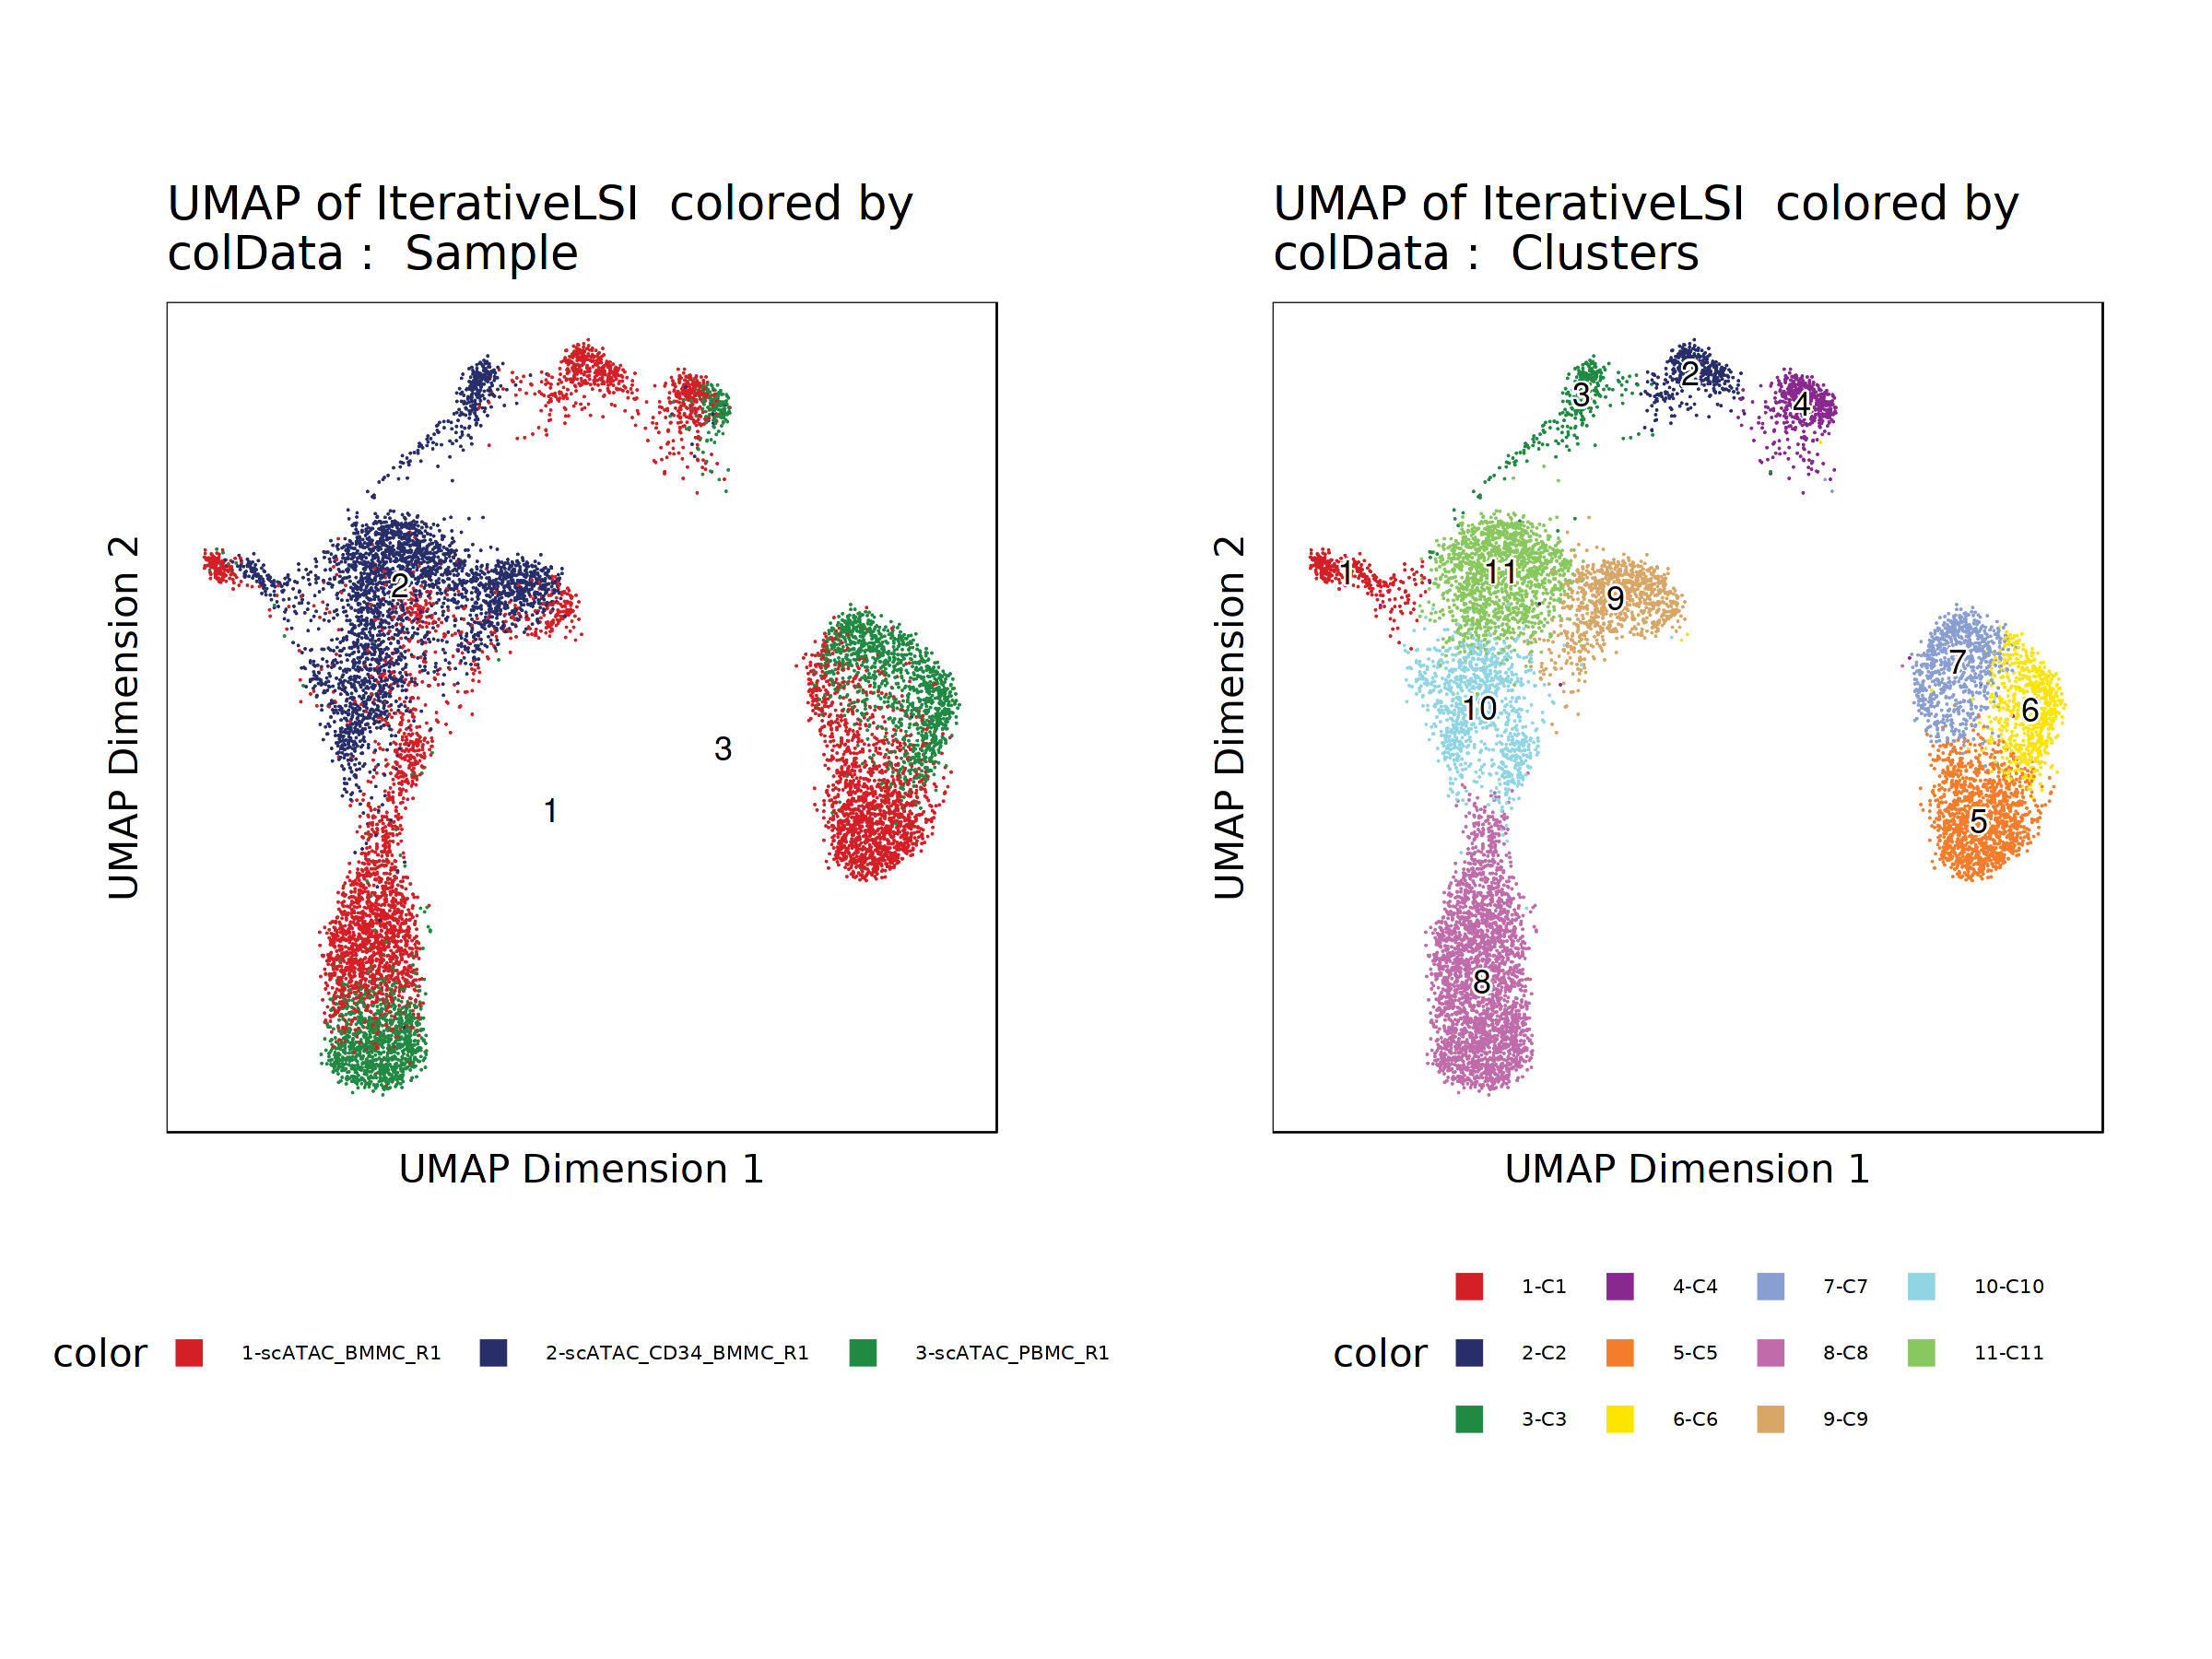

In [36]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 300)
ggAlignPlots(p1, p2, type = "h")

In [38]:
dir.create("../plots")

In [41]:
plotPDF(p1,p2, name = "Plot-UMAP-Sample-Clusters.pdf",
        ArchRProj = proj, addDOC = FALSE, width = 5, height = 5)

Plotting Ggplot!

Plotting Ggplot!



### Assigning Clusters with Gene Scores

In [42]:
proj <- addImputeWeights(proj)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-1a7a1da731188-Date-2023-11-14_Time-16-37-04.log
If there is an issue, please report to github with logFile!

2023-11-14 16:37:05 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [43]:
markerGenes  <- c(
    "CD34",  #Early Progenitor
    "GATA1", #Erythroid
    "PAX5", "MS4A1", "MME", #B-Cell Trajectory
    "CD14", "MPO", #Monocytes
    "CD3D", "CD8A"#TCells
  )

p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP",
    imputeWeights = getImputeWeights(proj)
)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1a7a1d1b8eac40-Date-2023-11-14_Time-16-38-00.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2023-11-14 16:38:00 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1a7a1d1b8eac40-Date-2023-11-14_Time-16-38-00.log



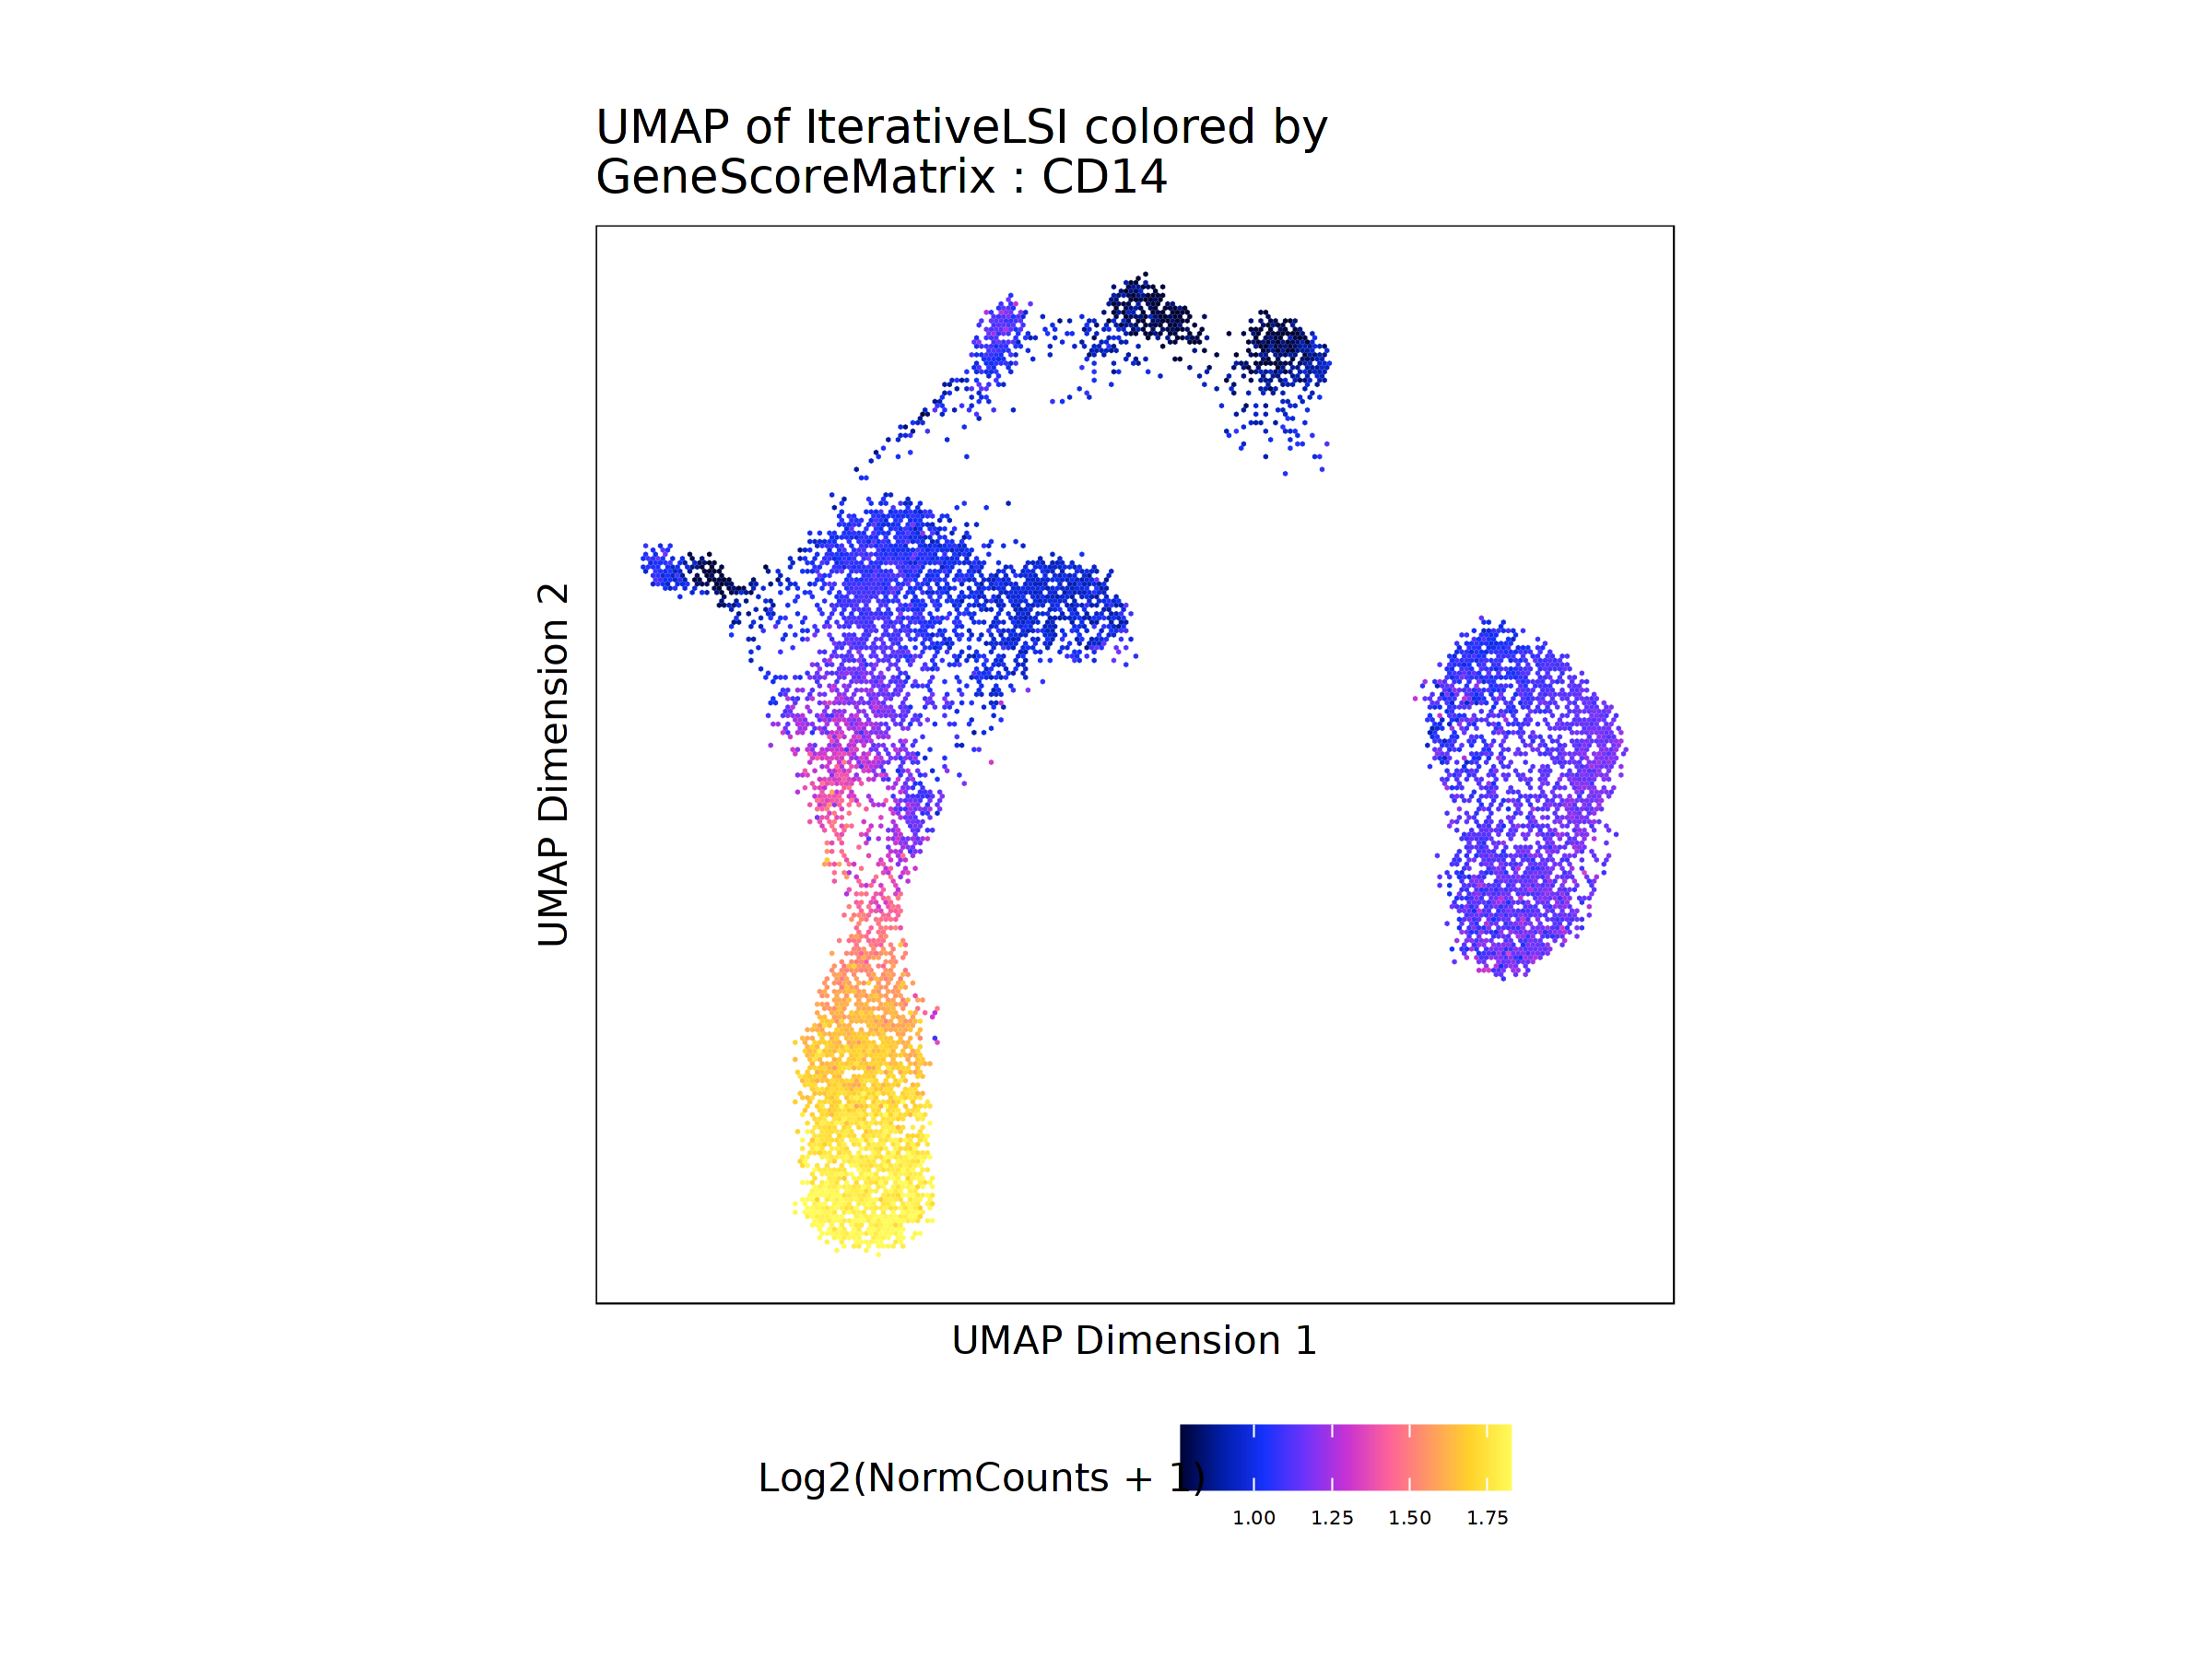

In [44]:
p$CD14


Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.”


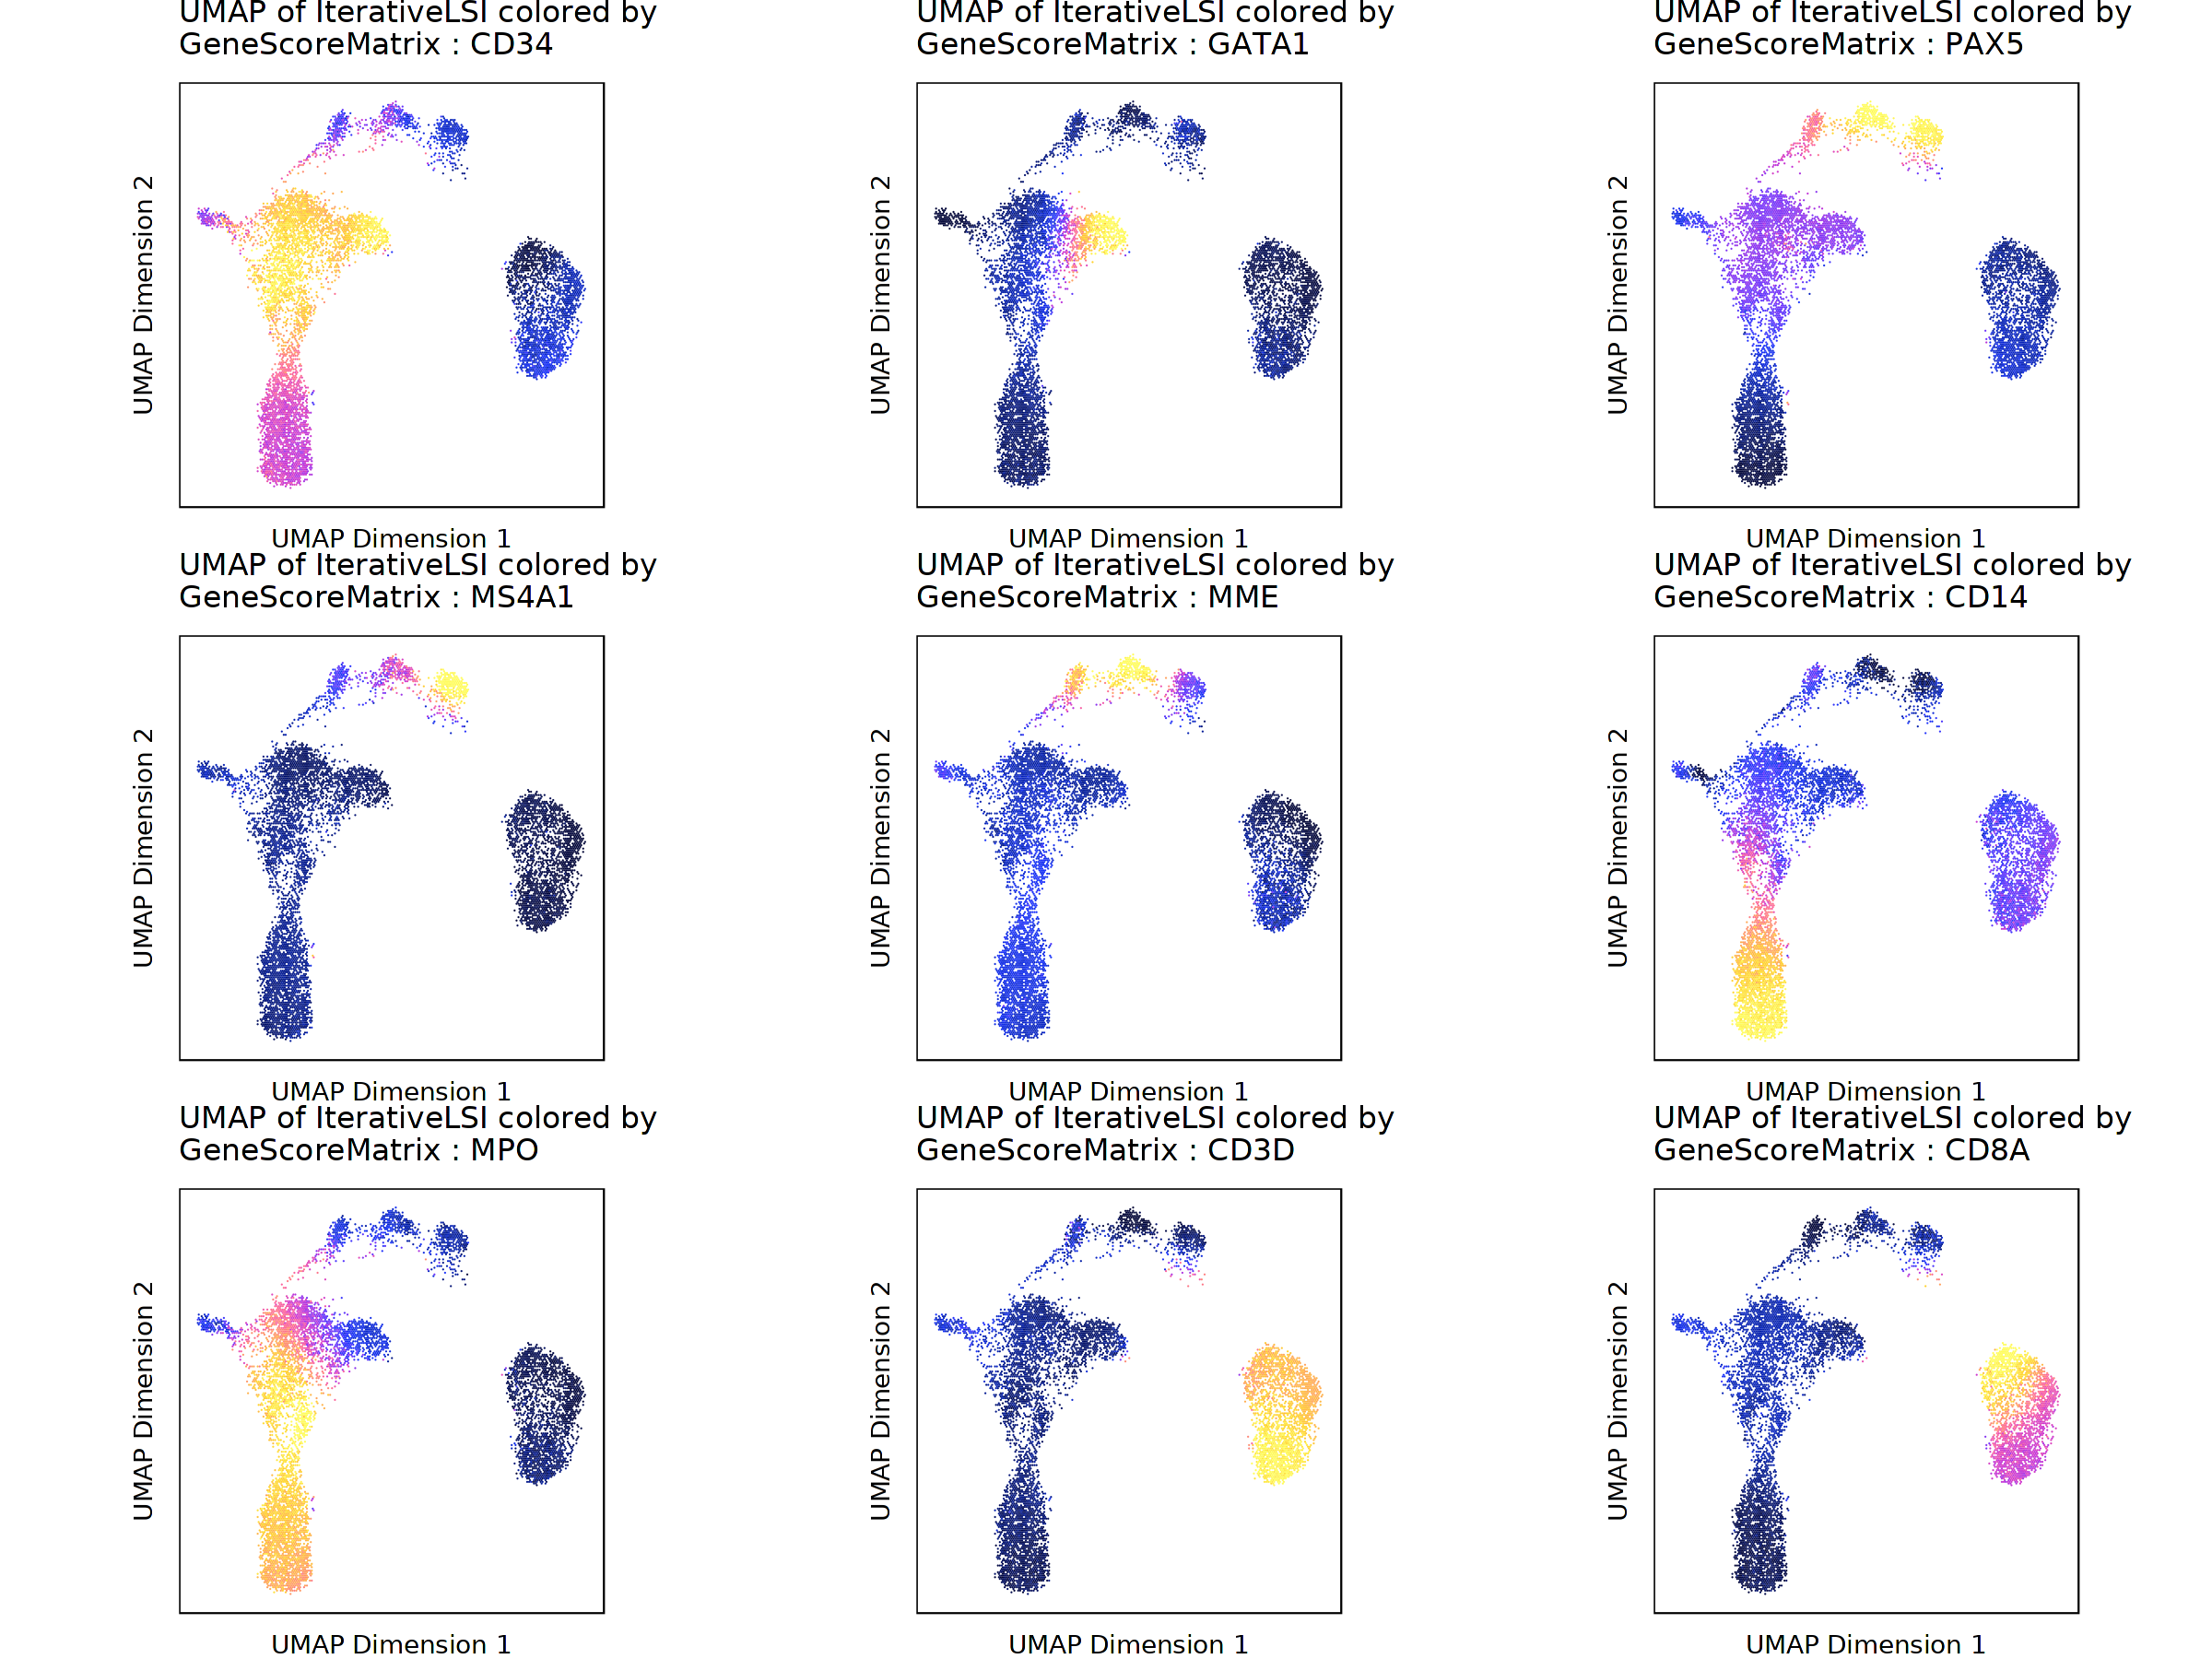

In [45]:
#Rearrange for grid plotting
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [48]:
plotPDF(plotList = p, 
    name = "Plot-UMAP-Marker-Genes-W-Imputation.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 5, height = 5)

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!



### Visualizing Genome Browser Tracks

In [49]:
p <- plotBrowserTrack(
    ArchRProj = proj, 
    groupBy = "Clusters", 
    geneSymbol = markerGenes, 
    upstream = 50000,
    downstream = 50000
)

ArchR logging to : ArchRLogs/ArchR-plotBrowserTrack-1a7a1d3b544a6e-Date-2023-11-14_Time-16-43-23.log
If there is an issue, please report to github with logFile!

2023-11-14 16:43:24 : Validating Region, 0.002 mins elapsed.



GRanges object with 9 ranges and 2 metadata columns:
      seqnames              ranges strand |     gene_id      symbol
         <Rle>           <IRanges>  <Rle> | <character> <character>
  [1]     chr1 208059883-208084683      - |         947        CD34
  [2]     chrX   48644982-48652717      + |        2623       GATA1
  [3]     chr9   36838531-37034476      - |        5079        PAX5
  [4]    chr11   60223282-60238225      + |         931       MS4A1
  [5]     chr3 154741913-154901518      + |        4311         MME
  [6]     chr5 140011313-140013286      - |         929        CD14
  [7]    chr17   56347217-56358296      - |        4353         MPO
  [8]    chr11 118209789-118213459      - |         915        CD3D
  [9]     chr2   87011728-87035519      - |         925        CD8A
  -------
  seqinfo: 24 sequences from hg19 genome


2023-11-14 16:43:24 : Adding Bulk Tracks (1 of 9), 0.005 mins elapsed.

2023-11-14 16:43:25 : Adding Gene Tracks (1 of 9), 0.022 mins elapsed.

2023-11-14 16:43:25 : Plotting, 0.028 mins elapsed.

2023-11-14 16:43:26 : Adding Bulk Tracks (2 of 9), 0.05 mins elapsed.

2023-11-14 16:43:27 : Adding Gene Tracks (2 of 9), 0.064 mins elapsed.

2023-11-14 16:43:28 : Plotting, 0.068 mins elapsed.

2023-11-14 16:43:29 : Adding Bulk Tracks (3 of 9), 0.088 mins elapsed.

2023-11-14 16:43:30 : Adding Gene Tracks (3 of 9), 0.104 mins elapsed.

2023-11-14 16:43:30 : Plotting, 0.108 mins elapsed.

2023-11-14 16:43:31 : Adding Bulk Tracks (4 of 9), 0.128 mins elapsed.

2023-11-14 16:43:32 : Adding Gene Tracks (4 of 9), 0.143 mins elapsed.

2023-11-14 16:43:33 : Plotting, 0.151 mins elapsed.

2023-11-14 16:43:34 : Adding Bulk Tracks (5 of 9), 0.171 mins elapsed.

2023-11-14 16:43:35 : Adding Gene Tracks (5 of 9), 0.186 mins elapsed.

2023-11-14 16:43:35 : Plotting, 0.191 mins elapsed.

2023-11-14 16:43

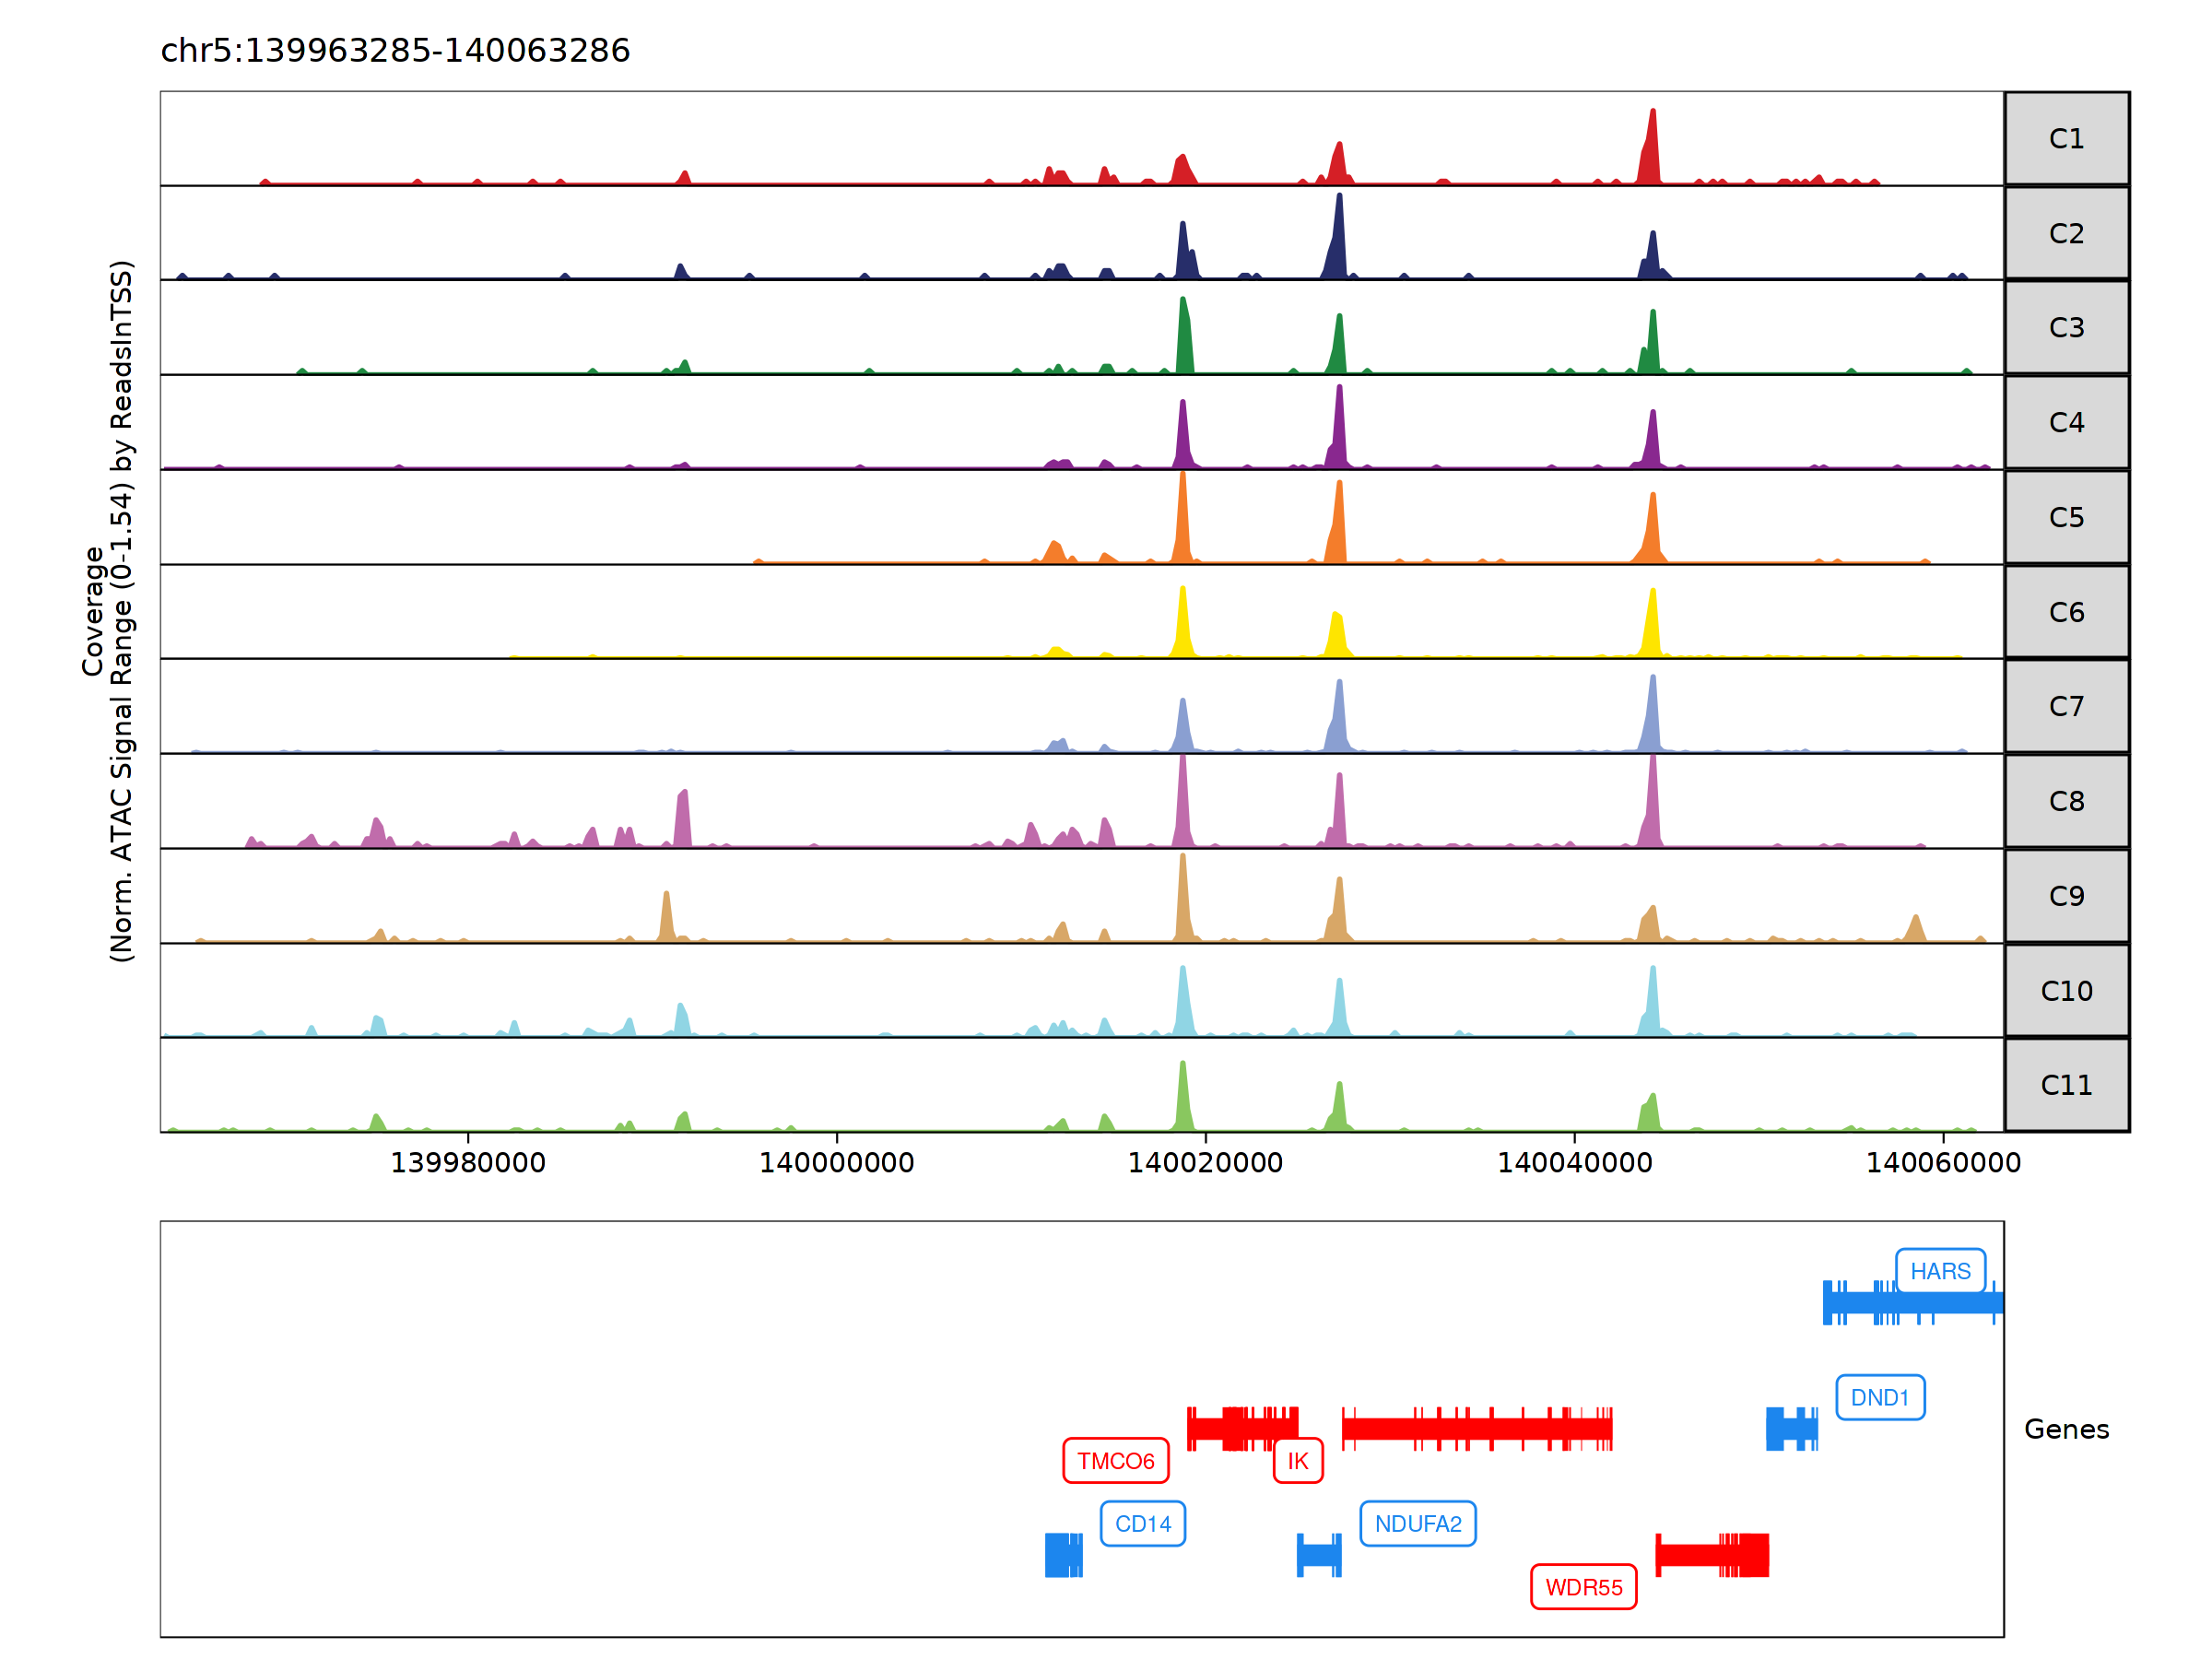

In [50]:
grid::grid.newpage()
grid::grid.draw(p$CD14)

In [51]:
plotPDF(plotList = p, 
    name = "Plot-Tracks-Marker-Genes.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 5, height = 5)

Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


Plotting Gtable!



NULL


In [52]:
ArchRBrowser(ArchRProj = proj)


ArchR logging to : ArchRLogs/ArchR-ArchRBrowser-1a7a1d6fdbf27-Date-2023-11-14_Time-16-50-08.log
If there is an issue, please report to github with logFile!

Warning message:
“The select input "name" contains a large number of options; consider using server-side selectize for massively improved performance. See the Details section of the ?selectizeInput help topic.”
Warning message in length(cellWidths) == 0 || is.na(cellWidths):
“'length(x) = 2 > 1' in coercion to 'logical(1)'”
Warning message in length(cellWidths) == 0 || is.na(cellWidths):
“'length(x) = 2 > 1' in coercion to 'logical(1)'”
Warning message in length(cellWidths) == 0 || is.na(cellWidths):
“'length(x) = 2 > 1' in coercion to 'logical(1)'”

Listening on http://127.0.0.1:5406



### Saving and Loading an ArchRProject 

In [53]:
proj <- saveArchRProject(ArchRProj = proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

In [54]:
proj <- loadArchRProject(path = "HemeTutorial")

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [56]:
Sys.Date()

[1] "2023-11-14"

In [57]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

Random number generation:
 RNG:     L'Ecuyer-CMRG 
 Normal:  Inversion 
 Sample:  Rejection 
 
locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] rhandsontable_0.3.8               shiny_1.6.0                      
 [3] ggrepel_0.9.1                     hexbin_1.28.3            